In [35]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
data = pd.read_csv('spam.csv', encoding='latin-1')

Saving spam.csv to spam (1).csv


In [36]:
labels = data['v1'].map({'ham': 0, 'spam': 1})

In [37]:
from sklearn.model_selection import train_test_split
X = data['v2']
y = labels

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [38]:
from tensorflow.keras.layers import TextVectorization

# Step 1: Create the TextVectorization layer with max_tokens set to 10,000
text_vectorization = TextVectorization(
    max_tokens=10000,
    output_mode='int',
    output_sequence_length=100
)

# Step 2: Fit the vectorization layer to the training data
text_vectorization.adapt(X_train)

In [39]:
# Step 3: Vectorize the training and validation data
X_train_vectorized = text_vectorization(X_train)
X_val_vectorized = text_vectorization(X_val)


In [40]:
# Step 4: Construct the sequence model
model = models.Sequential([
    layers.Flatten(),

    layers.Dense(32, activation='relu'),

    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

# Step 5: Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Step 6: Set up callbacks

callbacks = [
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
]

# Step 7: Fit the model

history = model.fit(X_train_vectorized, y_train,
          validation_data= (X_val_vectorized, y_val),
          epochs=50,
          callbacks=callbacks)

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6760 - loss: 108.8310 - val_accuracy: 0.8696 - val_loss: 27.7115
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8201 - loss: 53.7426 - val_accuracy: 0.8690 - val_loss: 20.2925
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8152 - loss: 34.0710 - val_accuracy: 0.8678 - val_loss: 14.1532
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8130 - loss: 24.7084 - val_accuracy: 0.8678 - val_loss: 10.7863
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8202 - loss: 16.6787 - val_accuracy: 0.8684 - val_loss: 8.5359
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8311 - loss: 10.3462 - val_accuracy: 0.8642 - val_loss: 6.1150
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8292 - loss: 7.6333 - val_accuracy: 0.8732 - val_loss: 4.9659
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8441 - loss: 4.7164 - val_a

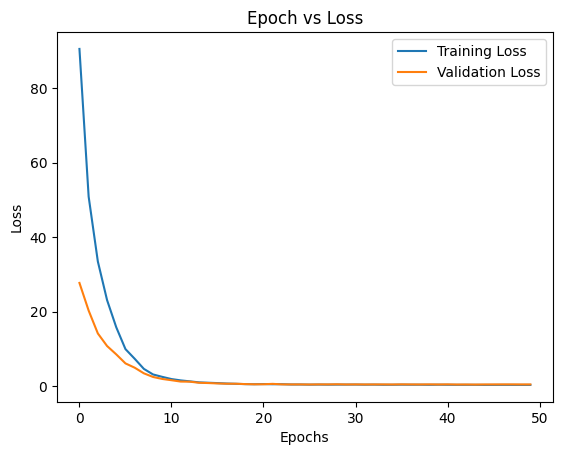

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Epoch vs Loss')
plt.show()


In [43]:
# Step 8: Load the best model saved during training
best_model = models.load_model('best_model.keras')

# Step 9: Evaluate the best model on the validation set
val_loss, val_accuracy = best_model.evaluate(X_val_vectorized, y_val)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8766 - loss: 0.4492
Validation Accuracy: 87.50%


In [44]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers, models

# Step 1: Create the TextVectorization layer
text_vectorization = TextVectorization(
    max_tokens=10000,
    output_mode='int',
    output_sequence_length=1000
)

# Step 2: Fit the TextVectorization layer to the training data
text_vectorization.adapt(X_train)

# Step 3: Vectorize the training and validation data
X_train_vectorized = text_vectorization(X_train)
X_val_vectorized = text_vectorization(X_val)


In [45]:
# Step 4: Construct the sequence model
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128, mask_zero=True, input_length=1000),

    layers.Bidirectional(layers.SimpleRNN(16)),

    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

# Step 5: Compile the model with binary cross-entropy loss and accuracy as metric
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Report the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Step 6: Set up callbacks
callbacks = [
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
]

# Step 7: Fit the model
history = model.fit(
    X_train_vectorized,
    y_train,
    validation_data=(X_val_vectorized, y_val),
    epochs=5,
    callbacks=callbacks
)


Epoch 1/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 122s 958ms/step - accuracy: 0.8227 - loss: 0.4285 - val_accuracy: 0.9731 - val_loss: 0.0855
Epoch 2/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 141s 952ms/step - accuracy: 0.9861 - loss: 0.0593 - val_accuracy: 0.9803 - val_loss: 0.0604
Epoch 3/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 147s 993ms/step - accuracy: 0.9958 - loss: 0.0221 - val_accuracy: 0.9844 - val_loss: 0.0540
Epoch 4/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 138s 958ms/step - accuracy: 0.9989 - loss: 0.0097 - val_accuracy: 0.9815 - val_loss: 0.0612
Epoch 5/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 140s 943ms/step - accuracy: 0.9998 - loss: 0.0054 - val_accuracy: 0.9821 - val_loss: 0.0620


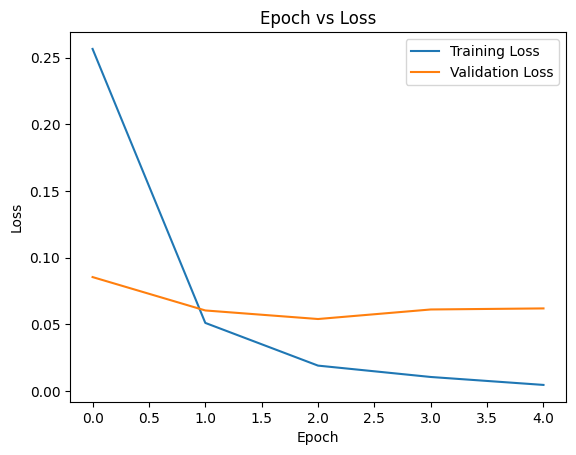

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()


In [55]:
# Load the best model
best_model = models.load_model('best_model.keras')

# Evaluate the best model on the validation data
val_loss, val_accuracy = best_model.evaluate(X_val_vectorized, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.9808 - loss: 0.0703
Validation Loss: 0.05402816832065582
Validation Accuracy: 0.9844497442245483


In [56]:
messages = [
    "Congratulations! You have been randomly selected to win a lifetime supply of jokes! Reply 'LOL' to claim your prize.",
    "Hey, I just wanted to let you know that I finally figured out how to make the perfect grilled cheese sandwich. It only took me 20 years and 50 failed attempts, but I did it!",
    "Your package could not be delivered, click this link"
]


In [57]:
messages_vectorized = text_vectorization(messages)


In [58]:
spam_probabilities = best_model.predict(messages_vectorized)

for i, message in enumerate(messages):
    print(f"Message {i+1}:")
    print(f"Probability of being spam: {spam_probabilities[i][0]:.4f}")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
Message 1:
Probability of being spam: 0.8821

Message 2:
Probability of being spam: 0.0019

Message 3:
Probability of being spam: 0.2418

